In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/Churn_Modelling.csv')

# New Section

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

**Univariate** **Analysis**

In [ ]:
df_France=df.loc[df['Geography']=='France']
df_Germany=df.loc[df['Geography']=='Germany']
df_Spain=df.loc[df['Geography']=='Spain']

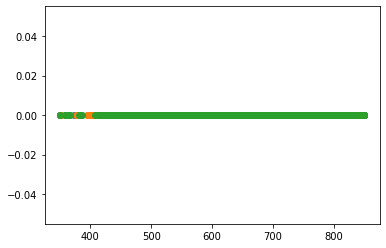

In [ ]:
plt.plot(df_France['CreditScore'],np.zeros_like(df_France['CreditScore']),'o')
plt.plot(df_Germany['CreditScore'],np.zeros_like(df_Germany['CreditScore']),'o')
plt.plot(df_Spain['CreditScore'],np.zeros_like(df_Spain['CreditScore']),'o')
plt.show()

**Bivariate** **Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


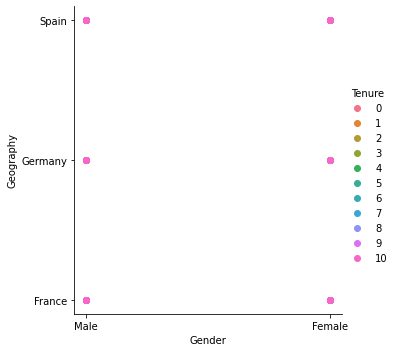

In [ ]:
sns.FacetGrid(df,hue="Tenure",size=5).map(plt.scatter,"Gender","Geography").add_legend();

**Multivariate** **Analysis**

In [ ]:
sns.pairplot(df,hue="Geography",size=5)

**Descriptive** **analysis**

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Geography'].value_counts().to_frame()

,Geography
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Surname'].value_counts().to_frame()

,Surname
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Izmailov,1
Bold,1
Bonham,1
Poninski,1


In [ ]:
Surname_counts = df['Surname'].value_counts().to_frame()
Surname_counts.rename(columns={'Surname':'value_counts'},inplace=True)
Surname_counts

,value_counts
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Izmailov,1
Bold,1
Bonham,1
Poninski,1


**Handle** **the** **mising** **values**

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df2=df.fillna(value = '1')
df2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show

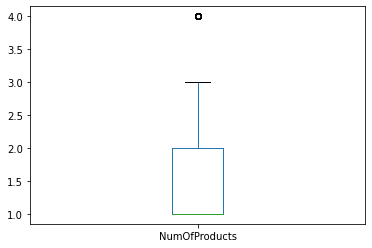

In [ ]:
plot_boxplot(df,"NumOfProducts")

**Outliers**

In [ ]:
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q2=df[ft].quantile(0.75)
  IQR= Q2 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [ ]:
 index_list = []
 for NumOfProducts in ['Surname' , 'Geography']:
   index_list.extend(outliers(df ,'NumOfProducts'))

In [ ]:
index_list[:20]

[7,
 70,
 1254,
 1469,
 1488,
 1701,
 1876,
 2124,
 2196,
 2285,
 2462,
 2499,
 2509,
 2541,
 2614,
 2617,
 2872,
 3152,
 3365,
 3841]

In [ ]:
def remove(df ,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
df_cleaned.shape

(9940, 14)

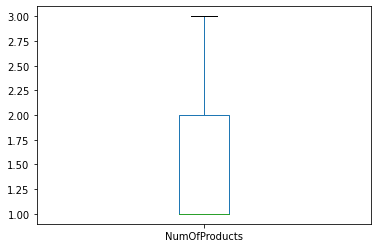

In [ ]:
plot_boxplot(df_cleaned, 'NumOfProducts')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [ ]:
df['CustomerId'].unique()[:10]

array([15634602, 15647311, 15619304, 15701354, 15737888, 15574012,
       15592531, 15656148, 15792365, 15592389])

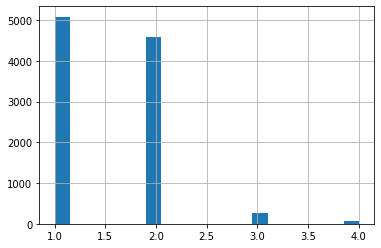

In [ ]:
df['NumOfProducts'].hist(bins=20)

In [ ]:
X= df.iloc[:,1:4]

In [ ]:
X

,CustomerId,Surname,CreditScore
0,15634602,Hargrave,619
1,15647311,Hill,608
2,15619304,Onio,502
3,15701354,Boni,699
4,15737888,Mitchell,850
...,...,...,...
9995,15606229,Obijiaku,771
9996,15569892,Johnstone,516
9997,15584532,Liu,709
9998,15682355,Sabbatini,772


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
Y= df.iloc[:,-1]

In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
X_train
len(X_train)

8000

In [ ]:
len(Y_train)

8000